Sample Data

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

In [2]:
class_names = ['Car', 'Motorcycle', 'Truck', 'Bus', 'Bicycle']

In [3]:
def draw_bbox(image_path, annotation_path , class_names):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Read YOLO annotations
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for line in lines:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())

        # Convert YOLO format to bounding box
        x_center *= width
        y_center *= height
        bbox_width *= width
        bbox_height *= height

        x_min = x_center - bbox_width / 2
        y_min = y_center - bbox_height / 2

        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add class label
        plt.text(x_min, y_min, class_names[int(class_id)], color='white', fontsize=12, backgroundcolor='red')

    plt.show()


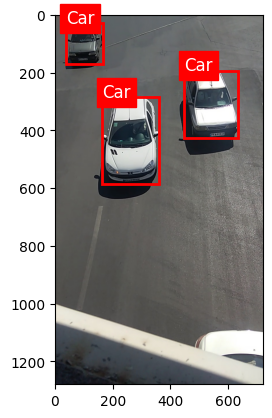

In [4]:
image_path = './dataset/images/train/160.jpg'
annotation_path = './dataset/labels/train/160.txt'
draw_bbox(image_path, annotation_path, class_names)

In [5]:
os.environ['WANDB_MODE'] = 'disabled'
cwd = os.getcwd() ## Current Path
model = YOLO('best.pt')
results = model.train(data=os.path.join(cwd, "dataset","data.yaml"), epochs=1000, imgsz=640, batch = 8)

New https://pypi.org/project/ultralytics/8.2.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.18 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: task=detect, mode=train, model=best.pt, data=c:\Users\gmita\Documents\GitHub\Vehicle-Tracking\YOLO\dataset\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning C:\Users\gmita\Documents\GitHub\Vehicle-Tracking\YOLO\dataset\labels\train.cache... 1142 images, 54 backgrounds, 1 corrupt: 100%|██████████| 1196/1196 [00:00<?, ?it/s]

train: WARNING ⚠️ C:\Users\gmita\Documents\GitHub\Vehicle-Tracking\YOLO\dataset\images\train\178.jpg: ignoring corrupt image/label: negative label values [  -0.017969]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\gmita\Documents\GitHub\Vehicle-Tracking\YOLO\dataset\labels\val.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


KeyboardInterrupt: 